In [166]:
!pip install matplotlib
!pip install librosa

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [141]:
# !pip install -U -q PyDrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive

# gauth = GoogleAuth()
# gauth.LocalWebserverAuth()

# drive = GoogleDrive(gauth)

**Import audio from experiment**

In [216]:
import librosa as librosa

# WINDTUNNEL_TESTING_PATH = '/content/drive/MyDrive/windtunnel_testing/'
# AUDIO_SAMPLED_AUDIO_PATH = 'recordings/mems_smallfilter_bellapc/wav_0.wav'
# AUDIO_SWEEP_PATH = 'injected_sounds/basic-sine-riser-71661.mp3'

LENGTH_OF_EXPERIMENT_SECONDS = 20.0 * 60.0 # 20 MINUTES
LENGTH_OF_PINK_NOISE_EXPERIMENT_SECONDS = 40

WINDTUNNEL_TESTING_PATH = '../'

AUDIO_SAMPLE_PATH = 'recordings/mems_ti003/'
AUDIO_SAMPLED_CLIP = 'wav_0.wav'
AUDIO_SWEEP_CLIP = 'injected_sounds/basic-sine-riser-71661.mp3'

In [217]:
# from google.colab import drive
# drive.mount('/content/drive')

In [218]:
# exp_audio_path = '/content/drive/MyDrive/Copy of wav_0.wav'
exp_audio_array, exp_sample_rate = librosa.load(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + AUDIO_SAMPLED_CLIP,mono=False,sr=None)
exp_audio_length = exp_audio_array.size / exp_sample_rate / 60.0 / 2
# print(exp_sample_rate)
# print(size(exp_audio_array))
print("Sample rate of imported audio: " + str(exp_sample_rate))
print("Length of imported audio: " + str(exp_audio_length) + " minutes")

Sample rate of imported audio: 48000
Length of imported audio: 21.458333333333332 minutes


**Import injected sound into arrays (i.e., sound sweep)**

In [219]:
from numpy.core.fromnumeric import size
import librosa

# sin_audio_path = '/content/drive/MyDrive/windtunnel_testing'
sin_audio_array, sin_sample_rate = librosa.load(WINDTUNNEL_TESTING_PATH + AUDIO_SWEEP_CLIP,sr=exp_sample_rate)
sin_audio_length = sin_audio_array.size / exp_sample_rate / 60.0
print("Sample rate of imported audio: " + str(sin_sample_rate))
print("  note: this has been upscaled")
print("Length of imported audio: " + str(sin_audio_length) + " minutes")

Sample rate of imported audio: 48000
  note: this has been upscaled
Length of imported audio: 0.2868 minutes


**Format data to work for scipy correlation**

In [220]:
#adjust sin_audio to be the same length as experiment audio by adding 0s
# gap = exp_audio_length - sin_audio_length
# sin_audio_array = numpy.append(sin_audio_array, [0] * gap)

In [221]:
# print(size(exp_audio_array))
# print(size(sin_audio_array))

**Apply Correlation**

In [222]:
LENGTH_OF_CLIP_TO_CORR = 120 # 120 seconds
OFFSET = 120 # 120 seconds

OFFSET_FOR_PINK = 102 + LENGTH_OF_PINK_NOISE_EXPERIMENT_SECONDS - 9 # hand tuned

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the cross-correlation of the two waveforms
corr = np.correlate(exp_audio_array[0,(OFFSET * exp_sample_rate):((LENGTH_OF_CLIP_TO_CORR+OFFSET) * exp_sample_rate)], sin_audio_array, mode='valid')

# Find the index of the maximum correlation coefficient
max_index = np.argmax(corr)

In [ ]:
# Plot the waveforms and the cross-correlation
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(sin_audio_array, label='Input waveform')
plt.legend()
plt.subplot(312)
plt.plot(exp_audio_array[0,(OFFSET * exp_sample_rate):((LENGTH_OF_CLIP_TO_CORR+OFFSET) * exp_sample_rate)], label='Sampled waveform')
plt.legend()
plt.subplot(313)

print("max index: " + str(max_index))
print(" this is at " + str(OFFSET + (max_index/exp_sample_rate)) + " seconds")
plt.plot(corr, label='Cross-correlation')
plt.plot(max_index, corr[max_index], 'ro', label='Best match')
plt.legend()
plt.show()

###### **Apply shift and save**

In [195]:
import numpy as np
from scipy.io.wavfile import write

aligned_audio = exp_audio_array[:,int(max_index+(OFFSET * exp_sample_rate)):int(max_index+(OFFSET+LENGTH_OF_EXPERIMENT_SECONDS) * exp_sample_rate)]
aligned_pink_noise_audio = exp_audio_array[:,int(max_index+(OFFSET-OFFSET_FOR_PINK-LENGTH_OF_PINK_NOISE_EXPERIMENT_SECONDS) * exp_sample_rate):int(max_index+(OFFSET-OFFSET_FOR_PINK) * exp_sample_rate)]

write(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'aligned.wav', exp_sample_rate, np.swapaxes(aligned_audio,0,1))
write(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'aligned_pink.wav', exp_sample_rate, np.swapaxes(aligned_pink_noise_audio,0,1))

In [209]:
print("loading: " + WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'aligned.wav')
aligned_audio,_ = librosa.load(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'aligned.wav',mono=False,sr=exp_sample_rate)
aligned_pink_noise_audio,_ = librosa.load(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'aligned_pink.wav',mono=False,sr=exp_sample_rate)


loading: ../recordings/mems_ti008/aligned.wav


**CUT UP SNIPPETS**

In [210]:
MINUTE = 60 * exp_sample_rate
SECOND = exp_sample_rate

CORRECTION = MINUTE + 32*SECOND + 22.5*SECOND

WIND_TEST_START = int(3*MINUTE + 51*SECOND - CORRECTION)
WIND_TEST_STOP = int(4*MINUTE + 21*SECOND - CORRECTION)

BEE_SOUND_START = int(4*MINUTE + 22.5*SECOND) - CORRECTION
BEE_SOUND_STOP = int(4*MINUTE + 27.5*SECOND) - CORRECTION

SINE_SWEEP_START = int(4*MINUTE + 30*SECOND - CORRECTION)
SINE_SWEEP_STOP = int(4*MINUTE + 42*SECOND - CORRECTION)

OFFSET_BETWEEN_TESTS = int(2*MINUTE + 4*SECOND)

NUM_OF_TESTS = 8

In [211]:
import os

In [212]:
os.mkdir(WINDTUNNEL_TESTING_PATH+AUDIO_SAMPLE_PATH+"sine_sweep_with_wind")
os.mkdir(WINDTUNNEL_TESTING_PATH+AUDIO_SAMPLE_PATH+"beebuzz_with_wind")
os.mkdir(WINDTUNNEL_TESTING_PATH+AUDIO_SAMPLE_PATH+"wind_only")

FileExistsError: [Errno 17] File exists: '../recordings/mems_ti008/sine_sweep_with_wind'

In [215]:
for test_num in range(NUM_OF_TESTS):
    
    if(test_num == 0):
        prefix = '3_17_m_s_'
    else:
        prefix = str(test_num + 3) + '_m_s_' 
     
    snippet = aligned_audio[:,int(SINE_SWEEP_START+(OFFSET_BETWEEN_TESTS*test_num)):int(SINE_SWEEP_STOP+(OFFSET_BETWEEN_TESTS*test_num))]
    write(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'sine_sweep_with_wind/' + prefix + 'sine_sweep_with_wind.wav', exp_sample_rate, np.swapaxes(snippet,0,1))
    snippet = aligned_audio[:,int(BEE_SOUND_START+(OFFSET_BETWEEN_TESTS*test_num)):int(BEE_SOUND_STOP+(OFFSET_BETWEEN_TESTS*test_num))]
    write(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'beebuzz_with_wind/' + prefix + 'beebuzz_with_wind.wav', exp_sample_rate, np.swapaxes(snippet,0,1))
    snippet = aligned_audio[:,int(WIND_TEST_START+(OFFSET_BETWEEN_TESTS*test_num)):int(WIND_TEST_STOP+(OFFSET_BETWEEN_TESTS*test_num))]
    write(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'wind_only/' + prefix + 'wind_only.wav', exp_sample_rate, np.swapaxes(snippet,0,1))

**Grab silent data, align, snip, and save**

In [201]:
print("loading: " + WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'silence.wav')
prescript_audio,_ = librosa.load(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'silence.wav',mono=False,sr=exp_sample_rate)

loading: ../recordings/mems_ti008/silence.wav


/var/folders/dh/35b0_f_54r9b3p6h77bn6hcw0000gn/T/ipykernel_21062/1575121514.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  prescript_audio,_ = librosa.load(WINDTUNNEL_TESTING_PATH + AUDIO_SAMPLE_PATH + 'silence.wav',mono=False,sr=exp_sample_rate)


FileNotFoundError: [Errno 2] No such file or directory: '../recordings/mems_ti008/silence.wav'

In [161]:
# Compute the cross-correlation of the two waveforms
corr = np.correlate(prescript_audio[0,:], sin_audio_array, mode='valid')


In [162]:
# Find the index of the maximum correlation coefficient
max_index = np.argmax(corr)

max index: 2637282
 this is at 54.943375 seconds


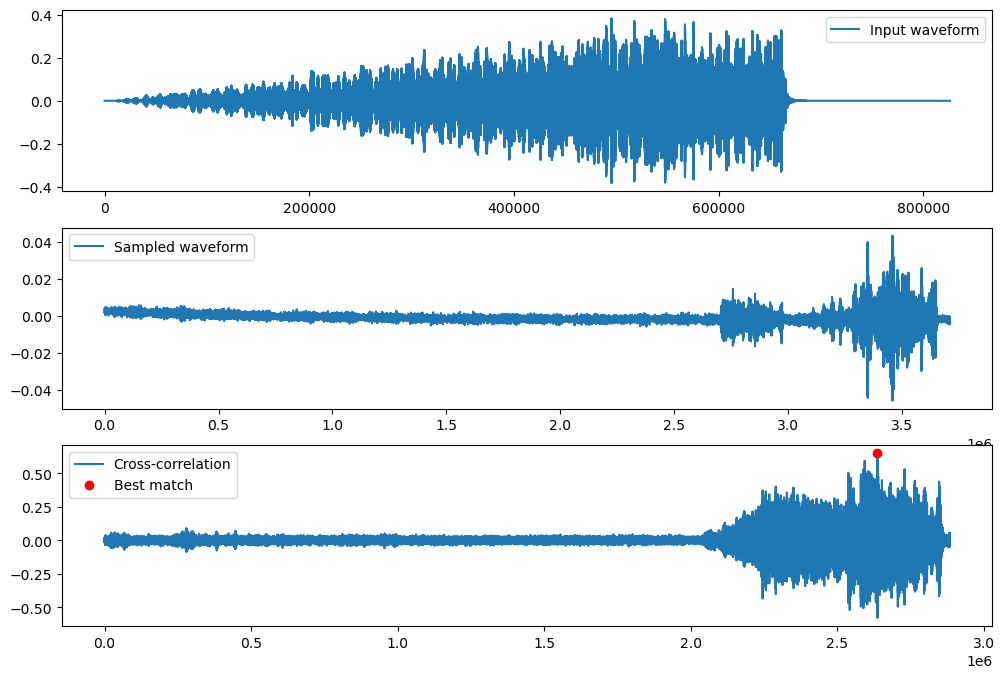

In [165]:
# Plot the waveforms and the cross-correlation
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(sin_audio_array, label='Input waveform')
plt.legend()
plt.subplot(312)
plt.plot(prescript_audio[0,:], label='Sampled waveform')
plt.legend()
plt.subplot(313)

print("max index: " + str(max_index))
print(" this is at " + str(max_index/exp_sample_rate) + " seconds")
plt.plot(corr, label='Cross-correlation')
plt.plot(max_index, corr[max_index], 'ro', label='Best match')
plt.legend()
plt.show()